<h1>Chapter 4 | Case Study A3 | <b>Management Quality and Firm Size: Describing Patterns of Association</b></h1>
<p>In this notebook, I'll be taking notes of the author's code on the referred case study. The goal is to reproduce the code in the original case studies repo and visualize a <b>boxplot</b> and a <b>violin plot</b> using the <code>wms-management-survey</code> dataset.</p>
<h2>1. Read the data</h2>

In [1]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *

warnings.filterwarnings("ignore")

c:\Users\Felipe\python_work\Projects\bk_data_analysis\da_case_studies\ch04-management_firm_size


In [10]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders
data_in = f"{dirname}da_data_repo/wms-management-survey/clean/"
data_out = f"{dirname}da_case_studies/ch04-wms_management_firm_size/"
output = f"{dirname}da_case_studies/ch04-wms_management_firm_size/output/"
func = f"{dirname}da_case_studies/ch00-tech_prep/"

sys.path.append(func)
func

'c:\\Users\\Felipe\\python_work\\Projects\\bk_data_analysis\\da_case_studies/ch00-tech_prep/'

In [11]:
# import the prewritten helper functions
from py_helper_functions import *

In [12]:
# Load the dataset
df = pd.read_csv(f"{data_in}wms_da_textbook.csv")

In [13]:
df.head()

,firmid,wave,cty,country,sic,management,operations,monitor,target,people,lean1,lean2,perf1,perf2,perf3,perf4,perf5,perf6,perf7,perf8,perf9,perf10,talent1,talent2,talent3,talent4,talent5,talent6,emp_firm,firmage,ownership,mne_yn,mne_cty,competition,export,degree_m,degree_nm,degree_t,i_seniority,reliability,...,aa_166,aa_167,aa_168,aa_169,aa_170,aa_171,aa_172,aa_173,aa_174,aa_175,aa_176,aa_177,aa_178,aa_179,aa_180,aa_181,aa_182,aa_183,aa_184,aa_185,aa_186,aa_187,aa_188,aa_189,aa_190,aa_191,aa_192,aa_193,aa_194,aa_195,aa_196,aa_197,aa_198,aa_199,aa_200,aa_201,aa_202,aa_203,aa_204,aa_205
0,1,2004,us,United States,38.0,3.500000,3.0,3.6,3.6,3.500000,3.0,3.0,4.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,3.0,3.0,400.0,37.0,Other,1.0,UNITED STATES,10+ competitors,NaN,NaN,NaN,NaN,4.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2006,us,United States,38.0,3.166667,5.0,3.8,2.6,2.500000,5.0,5.0,4.0,4.0,4.0,3.0,4.0,3.0,4.0,1.0,3.0,2.0,1.0,2.0,4.0,3.0,2.0,3.0,600.0,39.0,Dispersed Shareholders,0.0,NaN,1-4 competitors,NaN,100.0,75.0,78.75,3.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2010,us,United States,38.0,3.000000,2.0,2.8,3.6,3.000000,2.0,2.0,4.0,3.0,2.0,2.0,3.0,3.0,4.0,4.0,4.0,3.0,2.0,3.0,3.0,3.0,4.0,3.0,2000.0,42.0,Dispersed Shareholders,1.0,UNITED STATES,1-4 competitors,70.0,100.0,5.0,33.50,3.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,2004,us,United States,28.0,4.666667,4.5,4.8,4.4,4.833333,4.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,189.0,18.0,Other,1.0,UNITED STATES,10+ competitors,NaN,NaN,NaN,NaN,4.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,2004,us,United States,28.0,4.444445,4.5,4.6,4.4,4.333333,5.0,4.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,4.0,4.0,5.0,4.0,5.0,4.0,5.0,4.0,4.0,189.0,18.0,Other,1.0,UNITED STATES,10+ competitors,NaN,NaN,NaN,NaN,NaN,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<p>Our dataset contains a series of observations from many companies across several countries. Because we want to explore whether, and to what extent, larger firms are better managed, we will analyze a cross-section of <b>Mexican</b> firms from <b>2013</b>. To accomplish this, we need to sample our selection accordingly.</p>

In [14]:
# sample selection
df = df.query("country=='Mexico'&wave==2013&emp_firm>=100&emp_firm<=5000")

In [15]:
df.head()

,firmid,wave,cty,country,sic,management,operations,monitor,target,people,lean1,lean2,perf1,perf2,perf3,perf4,perf5,perf6,perf7,perf8,perf9,perf10,talent1,talent2,talent3,talent4,talent5,talent6,emp_firm,firmage,ownership,mne_yn,mne_cty,competition,export,degree_m,degree_nm,degree_t,i_seniority,reliability,...,aa_166,aa_167,aa_168,aa_169,aa_170,aa_171,aa_172,aa_173,aa_174,aa_175,aa_176,aa_177,aa_178,aa_179,aa_180,aa_181,aa_182,aa_183,aa_184,aa_185,aa_186,aa_187,aa_188,aa_189,aa_190,aa_191,aa_192,aa_193,aa_194,aa_195,aa_196,aa_197,aa_198,aa_199,aa_200,aa_201,aa_202,aa_203,aa_204,aa_205
10859,7778,2013,mx,Mexico,36.0,3.333333,3.5,3.6,2.8,3.500000,3.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,3.0,3.0,2.0,2.0,3.0,4.0,3.0,3.0,4.0,4.0,250.0,13.0,"Founder owned, external CEO",1.0,MEXICO,10+ competitors,20.0,100.0,20.0,28.000000,2.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10861,7780,2013,mx,Mexico,37.0,3.500000,2.5,4.0,3.8,3.166667,3.0,2.0,4.0,4.0,3.0,4.0,5.0,3.0,4.0,5.0,2.0,5.0,3.0,2.0,4.0,3.0,4.0,3.0,4500.0,10.0,Private Individuals,1.0,UNITED STATES,1-4 competitors,75.0,100.0,10.0,10.900000,3.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10862,7781,2013,mx,Mexico,30.0,3.888889,4.0,4.8,4.0,3.000000,4.0,4.0,5.0,5.0,4.0,5.0,5.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,4.0,3.0,3.0,3.0,290.0,69.0,Dispersed Shareholders,1.0,UNITED STATES,10+ competitors,15.0,100.0,30.0,34.900002,4.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10865,7783,2013,mx,Mexico,22.0,1.833333,1.0,2.4,1.8,1.666667,1.0,1.0,3.0,2.0,2.0,2.0,3.0,1.0,2.0,2.0,1.0,3.0,1.0,1.0,3.0,2.0,1.0,2.0,350.0,129.0,"Family owned, family CEO",0.0,NaN,10+ competitors,25.0,30.0,1.0,2.740000,1.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10866,7784,2013,mx,Mexico,20.0,2.222222,2.5,2.8,1.8,2.000000,2.0,3.0,3.0,2.0,2.0,3.0,4.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,2.0,2.0,200.0,34.0,"Founder owned, founder CEO",0.0,NaN,10+ competitors,0.0,100.0,0.0,2.000000,2.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<p>We can now go ahead and bin our firms by their size. We can use <code>emp_firm</code>, which measures the number of employees per firm, and create three bins of employment - small, medium, and large.</p>

In [16]:
# Create qualitative variables by binning the dataset
df.loc[df["emp_firm"] < 200, "emp3bins"] = "small"
df.loc[(df["emp_firm"] >= 200) & (df["emp_firm"] < 1000), "emp3bins"] = "medium"
df.loc[(df["emp_firm"] >= 1000), "emp3bins"] = "large"

In [17]:
df.head()

,firmid,wave,cty,country,sic,management,operations,monitor,target,people,lean1,lean2,perf1,perf2,perf3,perf4,perf5,perf6,perf7,perf8,perf9,perf10,talent1,talent2,talent3,talent4,talent5,talent6,emp_firm,firmage,ownership,mne_yn,mne_cty,competition,export,degree_m,degree_nm,degree_t,i_seniority,reliability,...,aa_167,aa_168,aa_169,aa_170,aa_171,aa_172,aa_173,aa_174,aa_175,aa_176,aa_177,aa_178,aa_179,aa_180,aa_181,aa_182,aa_183,aa_184,aa_185,aa_186,aa_187,aa_188,aa_189,aa_190,aa_191,aa_192,aa_193,aa_194,aa_195,aa_196,aa_197,aa_198,aa_199,aa_200,aa_201,aa_202,aa_203,aa_204,aa_205,emp3bins
10859,7778,2013,mx,Mexico,36.0,3.333333,3.5,3.6,2.8,3.500000,3.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,3.0,3.0,2.0,2.0,3.0,4.0,3.0,3.0,4.0,4.0,250.0,13.0,"Founder owned, external CEO",1.0,MEXICO,10+ competitors,20.0,100.0,20.0,28.000000,2.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,medium
10861,7780,2013,mx,Mexico,37.0,3.500000,2.5,4.0,3.8,3.166667,3.0,2.0,4.0,4.0,3.0,4.0,5.0,3.0,4.0,5.0,2.0,5.0,3.0,2.0,4.0,3.0,4.0,3.0,4500.0,10.0,Private Individuals,1.0,UNITED STATES,1-4 competitors,75.0,100.0,10.0,10.900000,3.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,large
10862,7781,2013,mx,Mexico,30.0,3.888889,4.0,4.8,4.0,3.000000,4.0,4.0,5.0,5.0,4.0,5.0,5.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,4.0,3.0,3.0,3.0,290.0,69.0,Dispersed Shareholders,1.0,UNITED STATES,10+ competitors,15.0,100.0,30.0,34.900002,4.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,medium
10865,7783,2013,mx,Mexico,22.0,1.833333,1.0,2.4,1.8,1.666667,1.0,1.0,3.0,2.0,2.0,2.0,3.0,1.0,2.0,2.0,1.0,3.0,1.0,1.0,3.0,2.0,1.0,2.0,350.0,129.0,"Family owned, family CEO",0.0,NaN,10+ competitors,25.0,30.0,1.0,2.740000,1.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,medium
10866,7784,2013,mx,Mexico,20.0,2.222222,2.5,2.8,1.8,2.000000,2.0,3.0,3.0,2.0,2.0,3.0,4.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,2.0,2.0,200.0,34.0,"Founder owned, founder CEO",0.0,NaN,10+ competitors,0.0,100.0,0.0,2.000000,2.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,medium


In [29]:
df2 = df[["emp3bins", "management"]].loc[df["emp3bins"] == "small"]

In [30]:
q1 = np.quantile(df2["management"], 0.25)
q2 = np.quantile(df2["management"], 0.5)
q3 = np.quantile(df2["management"], 0.75)
iqr = q3 - q1
upper_bound = max(df2.loc[df2["management"] < q3 + 1.5 * iqr, "management"])
lower_bound  = min(df2.loc[df2["management"] > q1 - 1.5 * iqr, "management"])
out_lower_bound = min(df2["management"])
mmin = min(df["management"])
mmax = max(df["management"])


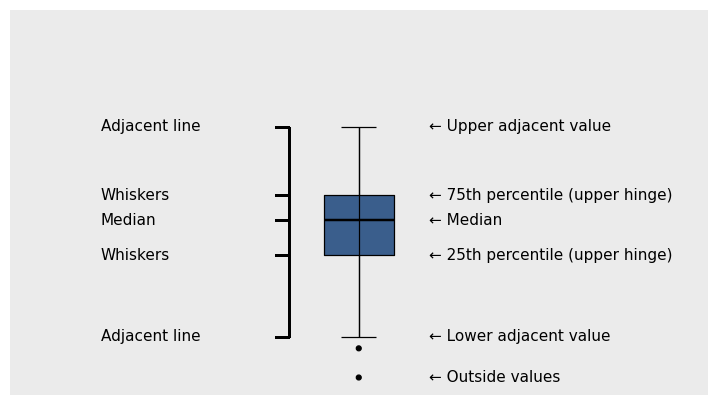

<ggplot: (174792769272)>

In [38]:
ggplot(df2, aes(x="emp3bins", y="management")) + geom_boxplot(
    color="black", fill=color[0], size=0.5, width=0.1, alpha=0.5
    ) + stat_boxplot(
        geom="errorbar", width=0.05, color="black", size=0.5
    ) + scale_y_continuous(
        limits=[mmin, mmax]
    ) + annotate(
        "text", x=1.1, y=upper_bound, label="← Upper adjacent value", ha="left"
    ) + annotate(
        "text", x=1.1, y=q3, label="← 75th percentile (upper hinge)", ha="left"
    ) + annotate(
        "text", x=1.1, y=q2, label="← Median", ha="left"
    ) + annotate(
        "text", x=1.1, y=q1, label="← 25th percentile (upper hinge)", ha="left"
    ) + annotate(
        "text", x=1.1, y=lower_bound, label="← Lower adjacent value", ha="left"
    ) + annotate(
        "text", x=1.1, y=out_lower_bound, label="← Outside values", ha="left"
    ) + annotate(
        "text", x=0.63, y=upper_bound, label="Adjacent line", ha="left"
    ) + annotate(
        "text", x=0.63, y=q3, label="Whiskers", ha="left"
    ) + annotate(
        "text", x=0.63, y=q2, label="Median", ha="left"
    ) + annotate(
        "text", x=0.63, y=q1, label="Whiskers", ha="left"
    ) + annotate(
        "text", x=0.63, y=lower_bound, label="Adjacent line", ha="left"
    ) + geom_segment(
        aes(x=0.9, y=lower_bound, xend=0.9, yend=upper_bound)
    ) + geom_segment(
        aes(x=0.88, y=lower_bound, xend=0.9, yend=lower_bound) 
    ) + geom_segment(
        aes(x=0.88, y=q1, xend=0.9, yend=q1) 
    ) + geom_segment(
        aes(x=0.88, y=q2, xend=0.9, yend=q2) 
    ) + geom_segment(
        aes(x=0.88, y=q3, xend=0.9, yend=q3) 
    ) + geom_segment(
        aes(x=0.88, y=upper_bound, xend=0.9, yend=upper_bound) 
    ) + theme(
        axis_title_x=element_blank(),
        axis_line_x=element_blank(),
        axis_ticks=element_blank(),
        axis_text_x=element_blank(),
        axis_title_y=element_blank(),
        axis_text_y=element_blank(),
        axis_line_y=element_blank(),
        panel_grid=element_blank(),
        panel_border=element_blank(),
        figure_size=(9, 5)
    )

<p>Nice, we got a boxplot of the firms binned as "small". We can now  plot a violin plot and observe the difference between both charts.</p>

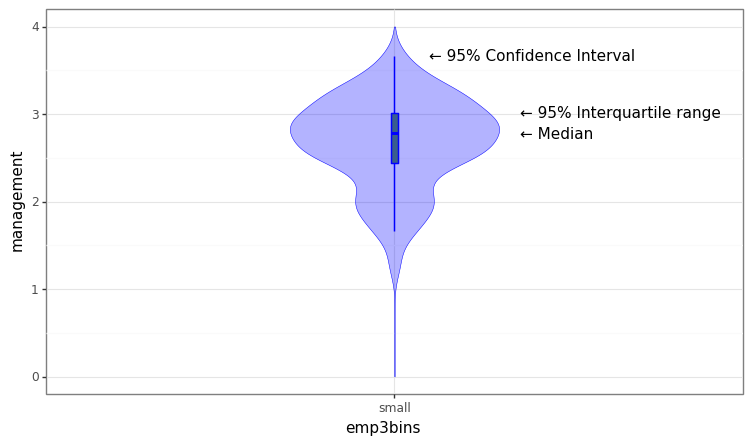

<ggplot: (174787807866)>

In [42]:
# violin plot with the same data 
ggplot(df2, aes(x="emp3bins", y="management")) + geom_violin(
    size=0.2,
    width=0.3,
    trim=False,
    show_legend=False,
    color="blue",
    fill="blue",
    alpha=0.3
) + geom_boxplot(
    color="blue", fill=color[0], size=0.6, width=0.01, alpha=0.5, outlier_shape=""
) + annotate(
    "text", x=1.05, y=upper_bound, label="← 95% Confidence Interval", ha="left"
) + annotate(
    "text", x=1.18, y=q3, label="← 95% Interquartile range", ha="left"
) + annotate(
    "text", x=1.18, y=q2, label="← Median", ha="left"
) + ylim(0,4) + theme_bw() + theme(figure_size=(9, 5))

<p>And there you have it!</p>
<hr>